<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/plr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('penguins.csv')

In [3]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
data.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [5]:
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,99.448479,5.459584,1.974793,14.061714,801.954536,0.818356
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,86.750000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,258.250000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [32]:

data.isnull().sum()

rowid                0
species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [31]:
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(),inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(),inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(),inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(),inplace=True)

In [33]:
data.isnull().sum()

rowid                0
species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [34]:
X=data.drop('species',axis=1).values
y=data['species'].values
print(y)

['Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adelie' 'Adel

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train.reshape(-1,1)
y_train.reshape(-1,1)
reg=LogisticRegression(C=0.5)
reg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.5)

In [41]:
reg.coef_

array([[-0.30089275, -0.05950562,  0.03896634, -0.13273717, -0.0046507 ,
         0.05604615],
       [ 0.35266242,  0.06060824,  0.02621343, -0.05508056, -0.00387241,
        -0.03215698],
       [-0.05176967, -0.00110262, -0.06517977,  0.18781773,  0.00852311,
        -0.02388917]])

In [43]:
reg.intercept_scaling

1

In [44]:
reg.predict_proba(X_train)

array([[1.00000000e+00, 3.13317643e-62, 3.85935372e-15],
       [1.00000000e+00, 3.15692646e-61, 1.08829330e-20],
       [5.87333519e-14, 5.49244027e-12, 1.00000000e+00],
       [9.99999932e-01, 7.70529557e-27, 6.81943216e-08],
       [1.89967195e-13, 2.32014751e-19, 1.00000000e+00],
       [1.83368214e-17, 9.84644742e-11, 1.00000000e+00],
       [5.40193966e-16, 9.99983520e-01, 1.64801063e-05],
       [9.99390780e-01, 4.97815745e-28, 6.09219734e-04],
       [9.70257894e-19, 5.88043573e-07, 9.99999412e-01],
       [2.56231934e-13, 1.54798934e-27, 1.00000000e+00],
       [9.99999271e-01, 4.08501304e-27, 7.28696831e-07],
       [1.00000000e+00, 1.09451654e-61, 5.26564536e-17],
       [1.81394191e-16, 3.31211965e-09, 9.99999997e-01],
       [1.00000000e+00, 6.41231369e-45, 1.52365991e-11],
       [1.00000000e+00, 1.12691328e-37, 4.07563741e-15],
       [1.00000000e+00, 3.42319242e-63, 1.15066662e-23],
       [1.00000000e+00, 3.10302542e-35, 7.75471698e-15],
       [1.20615712e-15, 1.09048

In [45]:
y_predict=reg.predict(X_test)
print(y_predict)

['Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Chinstrap' 'Chinstrap' 'Chinstrap'
 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie'
 'Adelie' 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Chinstrap'
 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap'
 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Chinstrap' 'Chinstrap' 'Adelie'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Gentoo' 'Gentoo']


In [46]:
reg.score(X_test, y_test)

1.0

In [47]:
confusion_matrix(y_test,y_predict)

array([[40,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 29]])

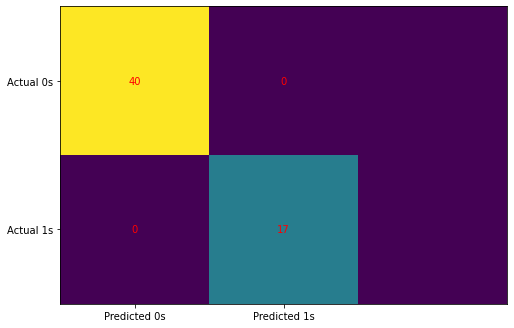

In [48]:
cm=confusion_matrix(y_test,y_predict)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        29

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

